In [1]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import custom_common
import matplotlib.pyplot as plt

base_df = pd.read_csv("D:\\bmstu\\gap_nuke\\datasets\\rk2_shagiahmetov.csv")
base_df.head(1)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN


C:\Users\Ponamarev\AppData\Local\Temp\ipykernel_10364\637981789.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = base_df.corr()


<Axes: >

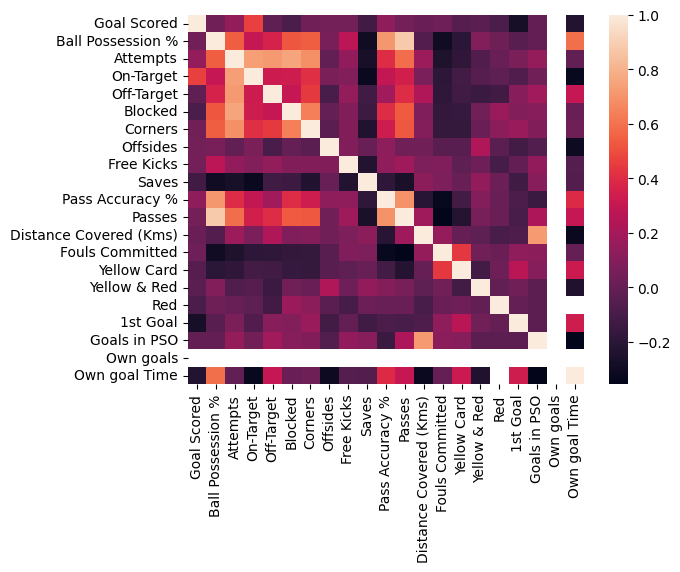

In [2]:
corr_df = base_df.corr()

sns.heatmap(corr_df, annot=False)

Как мы видим, есть две группы метрик, которые очень сильно, почти линейно зависят друг от друга. Попробуем применить модели к таким данным:

In [3]:
base_df.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

Закодируем категориальные признаки

In [4]:
train_df = custom_common.auto_encode(base_df)
custom_common.draw_missing(base_df)

,Total,Percent
Column,,
Own goal Time,116,90.6250
Own goals,116,90.6250
1st Goal,34,26.5625


В колонаках Own goal Time и Own goals процент пропусков больше 50, поэтому эти колонки стоит просто не учитывать

In [5]:
train_df = custom_common.handle_missing_data(train_df, 50)
custom_common.draw_missing(train_df)

,Total,Percent
Column,,


Пропуски заполнены, данные готовы, приступаем к обработке.

{'mse': 5888.2307692307695, 'mae': 63.53846153846154, 'r2': 0.7330951394938654, 'evs': 0.7548809978499791}


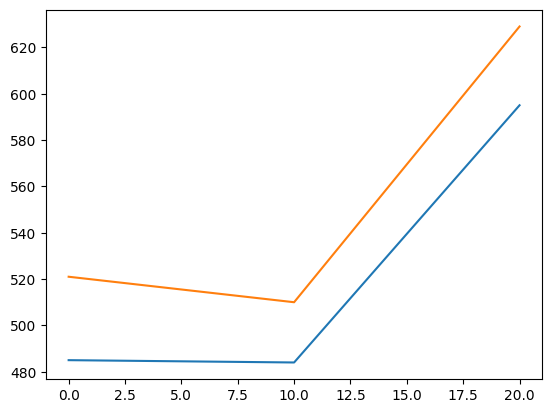

In [10]:
def train_model(model, dataset, target):
    X_train, X_test, y_train, y_test = train_test_split(dataset.drop(target, axis=1), dataset[target], test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    # f1 = f1_score(y_test, y_pred)
    x_axis = range(len(y_test))
    plt.plot(x_axis[::10], y_test[::10])
    plt.plot(x_axis[::10], y_pred[::10])
    plt.plot()
    return{
        "mse": mse,
        "mae": mae,
        "r2": r2,
        "evs": evs
    }

des_tree_metrics = train_model(DecisionTreeRegressor(), train_df, "Passes")
print(des_tree_metrics)


{'mse': 4.011992307692308, 'mae': 1.3353846153846158, 'r2': 0.8721910084825636, 'evs': 0.88240205466541}


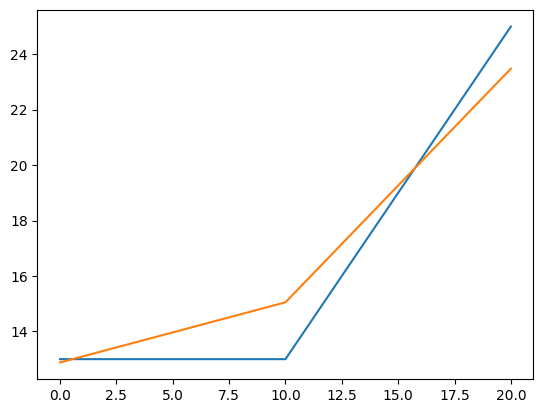

In [12]:
random_forst_metrics = train_model(RandomForestRegressor(), train_df, "Attempts")
print(random_forst_metrics)

## Выводы
**MSE и MAE** Чем меньше значение MSE и MAE, тем лучше модель. В данном случае, значения не очень большие и  график близок к прогнозируемым значениям.

**R2 (Коэффициент детерминации)**  R2 показывает, насколько хорошо модель соответствует данным и предсказывает целевую переменную. Значение R2 близкое к 1 указывает на высокую степень соответствия модели данным. В данном случае, значение R2 говорит о высоком уровне соответствия модели данным.

**EVS (Объясненная дисперсия)**  EVS показывает, какую долю дисперсии фактических значений модель способна объяснить. Значение EVS близкое к 1 указывает на высокую объясненную дисперсию моделью. В данном случае, значение EVS говорит о высокой способности модели объяснять вариацию целевой переменной.

Окончательный вывод: модели классные, мы молодцы.